In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import analyze
import raybay

In [2]:
# Load treatment plan results
result = np.load('result', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,1560,18.52,NaN,"[1,1000]"
1,Bronchus,MaxDose,3480,0.00,NaN,"[1,1000]"
2,Chestwall_L,MaxDvh,3000,2.04,NaN,"[1,1000]"
3,D2cm,MaxDose,2400,0.00,NaN,"[1,1000]"
4,Esophagus,MaxDvh,1880,16.91,NaN,"[1,1000]"
5,Esophagus,MaxDose,3000,0.00,NaN,"[1,1000]"
6,GreatVes,MaxDvh,4300,5.66,NaN,"[1,1000]"
7,GreatVes,MaxDose,4900,0.00,NaN,"[1,1000]"
8,Heart,MaxDvh,2800,1.84,NaN,"[1,1000]"
9,Heart,MaxDose,3400,0.00,NaN,"[1,1000]"


In [6]:
# Clinical goal results
compare = pd.DataFrame()
idx_sol = np.argmin(result.opt_result.func_vals)
for idx_goal, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[idx_goal][idx_sol]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'Result': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'Result', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,Result,PercentChange
0,Bronchus,MaxDvh,1560.0,951.173983,-39.027309
1,Bronchus,MaxDose,3480.0,2214.379883,-36.368394
2,Chestwall_L,MaxDvh,3000.0,2027.030891,-32.432304
3,D2cm,MaxDose,2400.0,2872.012939,19.667206
4,Esophagus,MaxDvh,1880.0,738.848958,-60.699524
5,Esophagus,MaxDose,3000.0,1156.470337,-61.450989
6,GreatVes,MaxDvh,4300.0,1193.675872,-72.240096
7,GreatVes,MaxDose,4900.0,1743.359375,-64.421237
8,Heart,MaxDvh,2800.0,911.294193,-67.453779
9,Heart,MaxDose,3400.0,1503.924561,-55.766925


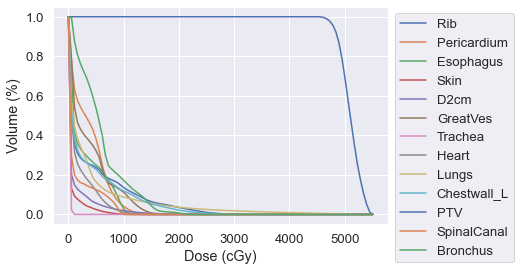

In [7]:
# Dose-volume histograms
result.dvhplot()

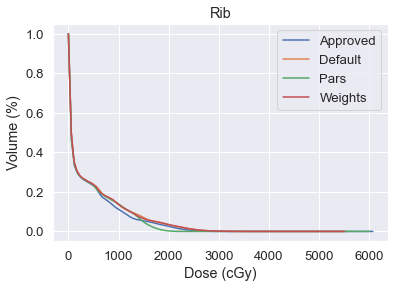

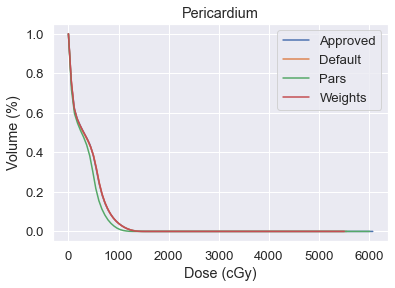

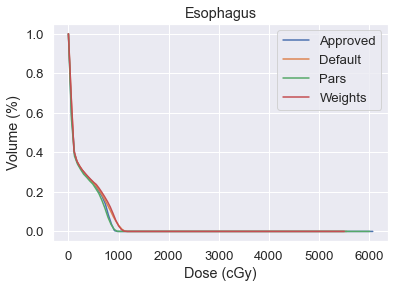

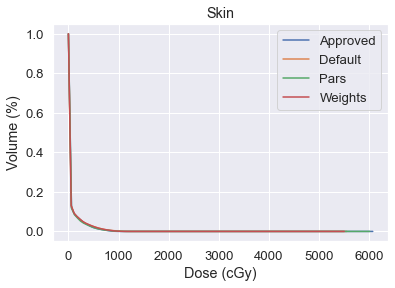

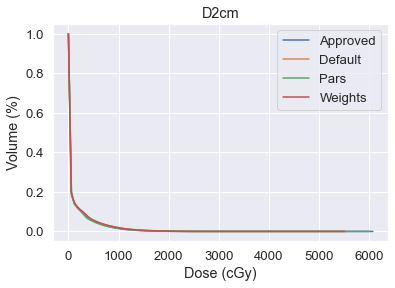

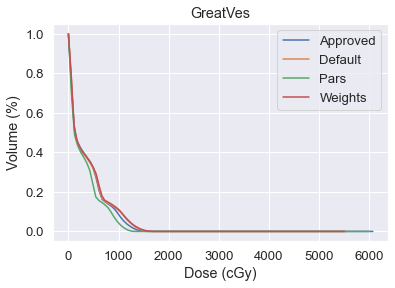

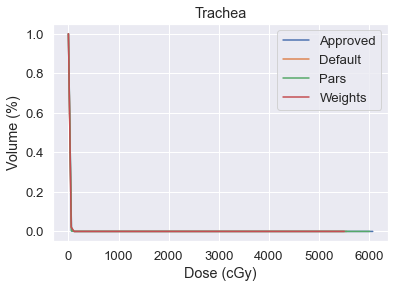

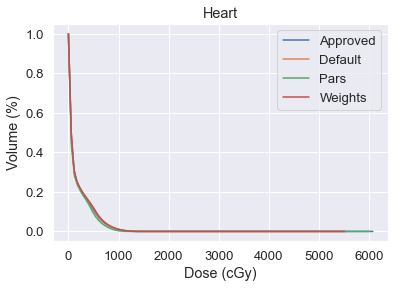

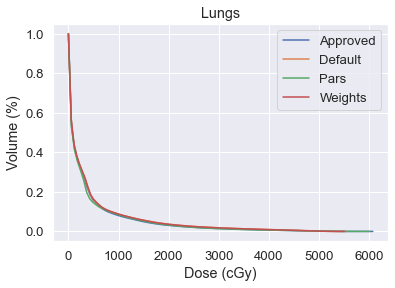

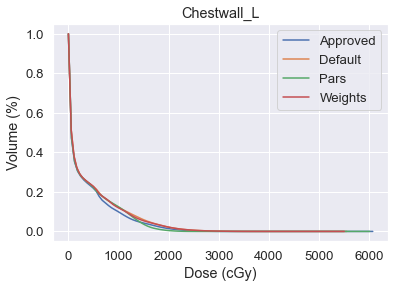

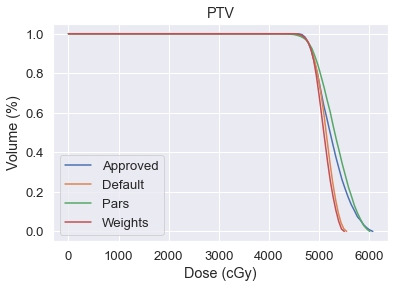

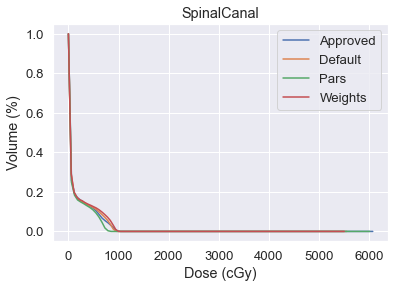

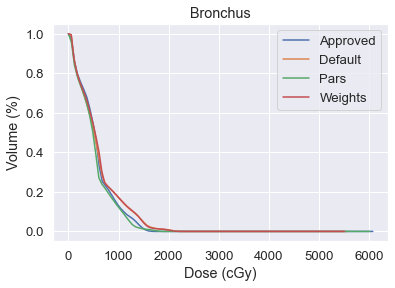

In [8]:
# Compare to other plans
approved = np.load('../approved/result', allow_pickle=True)
default = np.load('../default/result', allow_pickle=True)
pars = np.load('../bayes_pars/result', allow_pickle=True)
for roi in result.roi_list:
    plt.figure()
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
    plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
    plt.plot(pars.dvh_dict['Dose'], pars.dvh_dict[roi])
    plt.plot(result.dvh_dict['Dose'], result.dvh_dict[roi])
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.title(roi)
    plt.legend(['Approved', 'Default', 'Pars', 'Weights'])

In [9]:
# Compare DC2m MaxDose
par_sol = np.argmin(pars.opt_result.func_vals)
idx_d2 = approved.goal_df[approved.goal_df['Roi'] == 'D2cm'].index[0]
print(f"AcceptanceLevel: {approved.goal_df.iloc[idx_d2]['AcceptanceLevel']}, " +
      f"Approved: {approved.goal_dict[idx_d2][0]:.2f}, " +
      f"Default: {default.goal_dict[idx_d2][0]:.2f}, " +
      f"Pars: {pars.goal_dict[idx_d2][par_sol]:.2f}, " + 
      f"Weights: {result.goal_dict[idx_d2][idx_sol]:.2f}")

AcceptanceLevel: 2400, Approved: 2513.27, Default: 3082.28, Pars: 2738.48, Weights: 2872.01


In [10]:
# Compare goal results
for idx_goal, row in approved.goal_df.iterrows():
    level = row['AcceptanceLevel']
    app_val = approved.goal_dict[idx_goal][0]
    def_val = default.goal_dict[idx_goal][0]
    par_val = pars.goal_dict[idx_goal][par_sol]
    res_val = result.goal_dict[idx_goal][idx_sol]
    print(f"Roi: {row['Roi']}, Approved: {100*(app_val - level)/level:.2f}, " +
          f"Default: {100*(def_val - level)/level:.2f}, " +
          f"Pars: {100*(par_val - level)/level:.2f}, " +
          f"Weights: {100*(res_val - level)/level:.2f}")

Roi: Bronchus, Approved: -44.69, Default: -38.97, Pars: -47.53, Weights: -39.03
Roi: Bronchus, Approved: -49.12, Default: -35.17, Pars: -45.99, Weights: -36.37
Roi: Chestwall_L, Approved: -37.88, Default: -32.47, Pars: -45.14, Weights: -32.43
Roi: D2cm, Approved: 4.72, Default: 28.43, Pars: 14.10, Weights: 19.67
Roi: Esophagus, Approved: -63.35, Default: -62.48, Pars: -65.42, Weights: -60.70
Roi: Esophagus, Approved: -67.97, Default: -60.64, Pars: -66.89, Weights: -61.45
Roi: GreatVes, Approved: -74.63, Default: -72.61, Pars: -77.74, Weights: -72.24
Roi: GreatVes, Approved: -66.06, Default: -65.80, Pars: -72.50, Weights: -64.42
Roi: Heart, Approved: -68.24, Default: -67.95, Pars: -71.17, Weights: -67.45
Roi: Heart, Approved: -57.57, Default: -55.44, Pars: -61.88, Weights: -55.77
Roi: Lungs, Approved: -60.82, Default: -57.34, Pars: -59.10, Weights: -57.23
Roi: Lungs, Approved: -75.56, Default: -74.81, Pars: -77.17, Weights: -74.21
Roi: Pericardium, Approved: -62.60, Default: -62.71, Par

In [11]:
# Looks similar to default, slightly better in some areas (D2cm),
# but not as good as tuning parameters, and not better than approved plan.

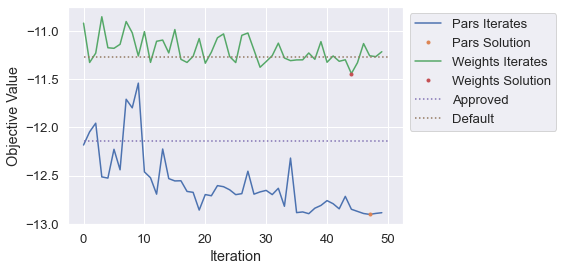

In [12]:
# Objective function convergence
plt.plot(pars.opt_result.func_vals)
plt.plot(par_sol, pars.opt_result.fun, '.')
plt.plot(result.opt_result.func_vals)
plt.plot(idx_sol, result.opt_result.fun, '.')
plt.plot([0, 50], [approved.opt_result, approved.opt_result], ':')
plt.plot([0, 50], [default.opt_result, default.opt_result], ':')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.legend(['Pars Iterates', 'Pars Solution', 'Weights Iterates', 'Weights Solution', 'Approved', 'Default'],
           bbox_to_anchor=(1, 1));

/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


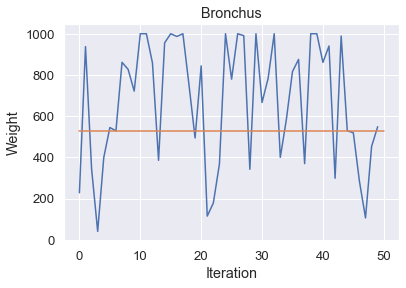

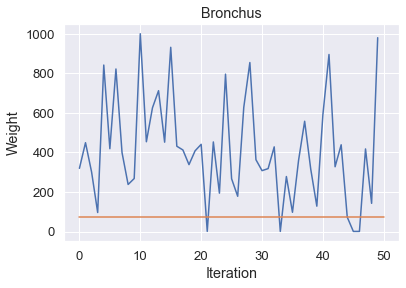

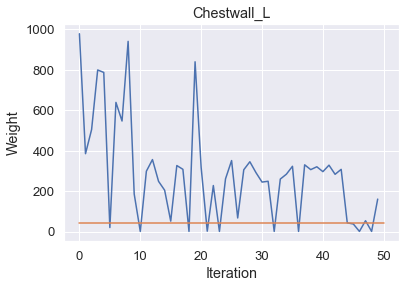

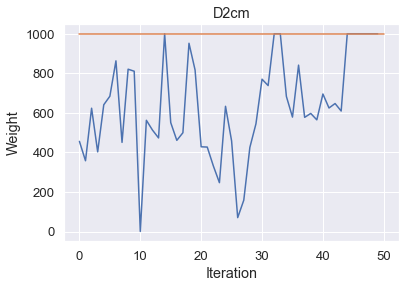

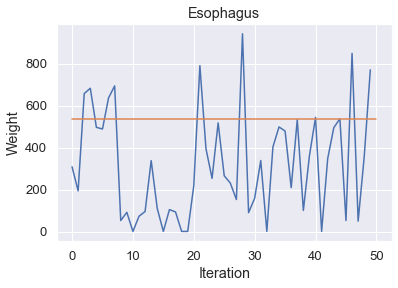

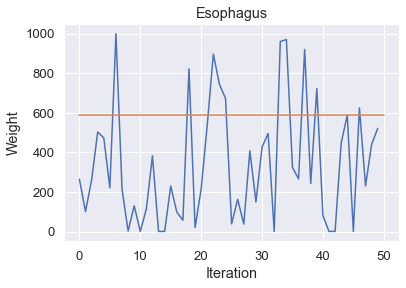

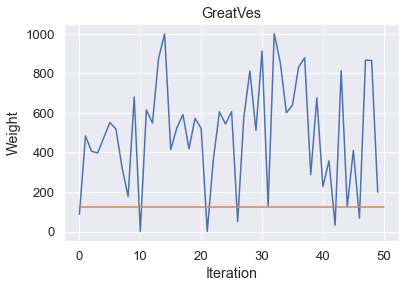

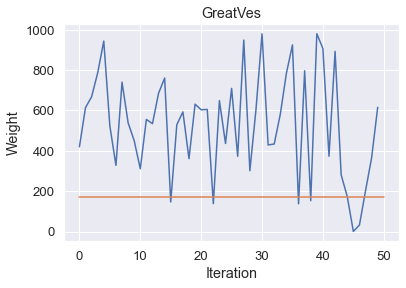

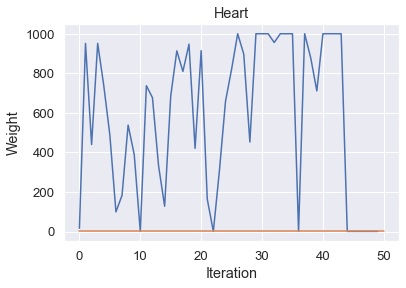

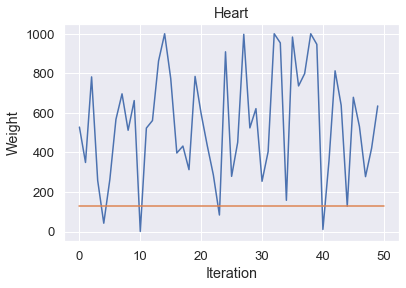

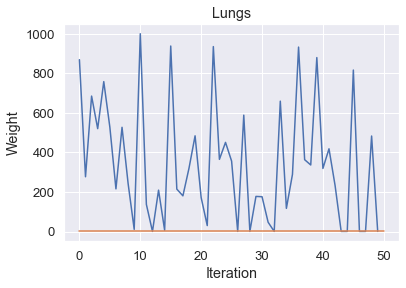

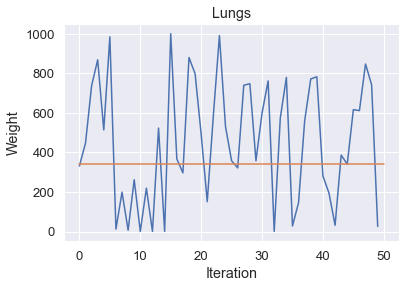

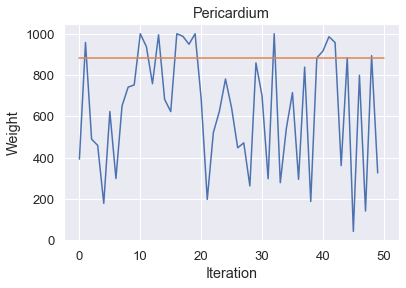

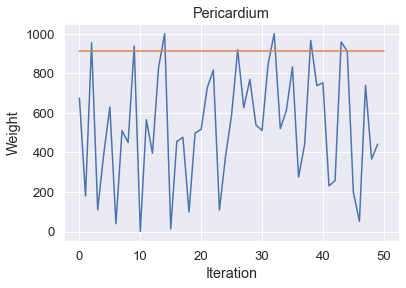

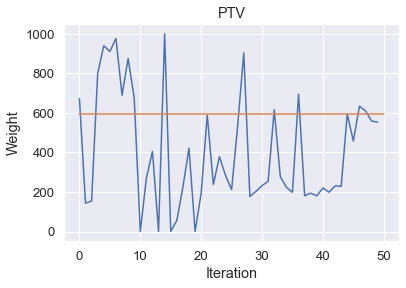

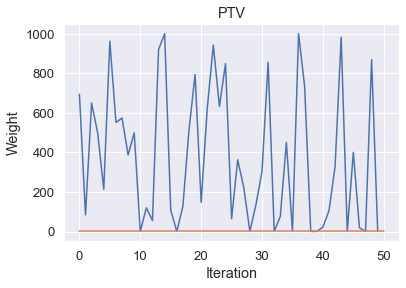

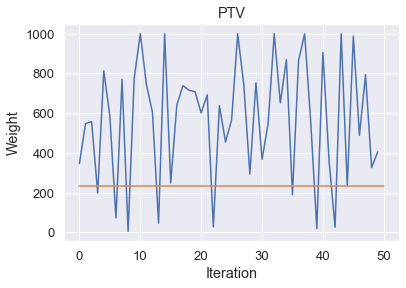

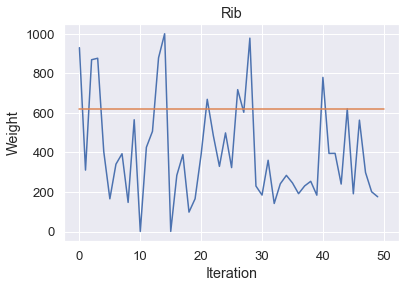

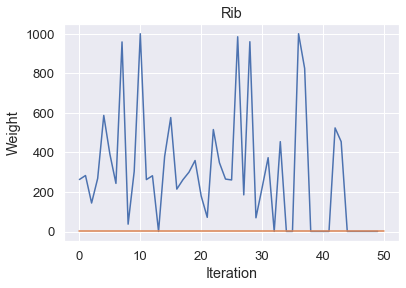

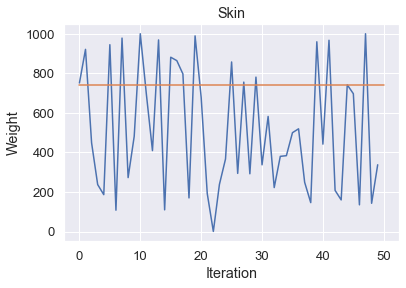

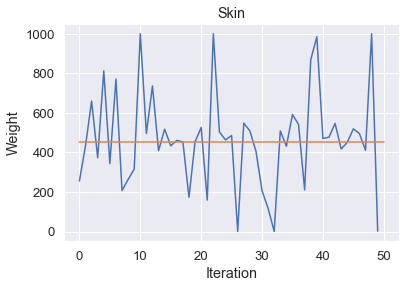

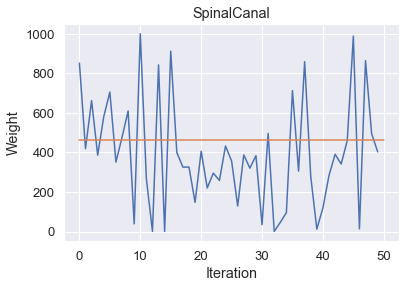

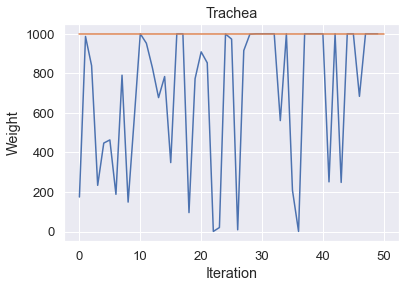

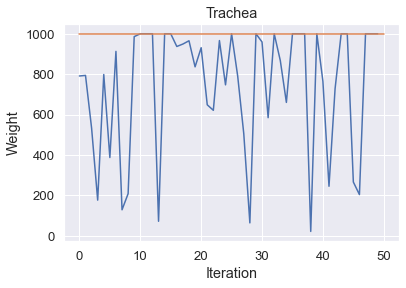

In [13]:
# Parameter value convergence
x_iters = [[row[ii] for row in result.opt_result.x_iters] for ii in range(len(result.opt_result.x_iters[0]))]
par_df = analyze.get_pars(result.func_df)
for ii, vals in enumerate(x_iters):
    plt.figure()
    plt.plot(vals)
    plt.plot([0, 50], [result.opt_result.x[ii], result.opt_result.x[ii]])
    plt.xlabel('Iteration')
    plt.ylabel(par_df.iloc[ii]['Par'])
    plt.title(par_df.iloc[ii]['Roi'])

In [14]:
# Doesn't look like anything really converging to a particular value.

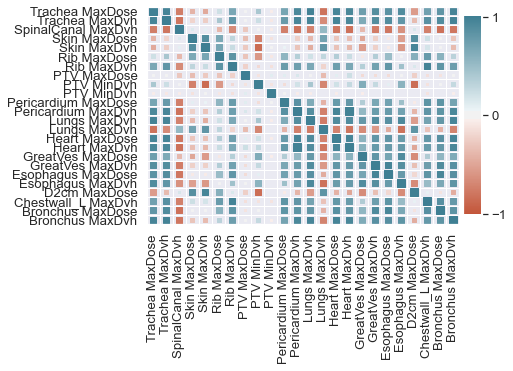

In [15]:
result.corrplot(size=50)

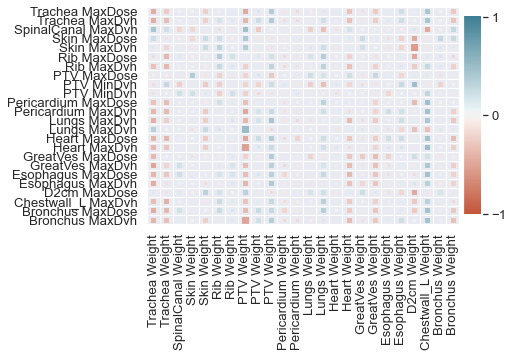

In [16]:
result.corrplot('pars', size=50)

In [17]:
# Just realized that I tuned ALL of the weights, rather than just the subset of the goals :(